# Лабораторная работа №4.2.1 "Кольца Ньютона"

## Картина биений

По картине в микроскопе подсчитаем число полос между серединами двух зон с максимальной яркостью: $\Delta m = 14$

По этим данным можно составить разность длин волн (полагая $\lambda_2 < \lambda_1$):

$\Delta m \lambda_1 = (\Delta m + 1) (\lambda_1 - \Delta \lambda)$ 

Отсюда $\Delta \lambda = \cfrac{\lambda_1}{\Delta m + 1}$

$\lambda_1 = 546$ нм

$\Delta \lambda = 36.4$ нм

Ему соответствует длина волны $\lambda_2 = 582$ нм. Табличное значение для желтого света: $\lambda_\text{табл} = 578$ нм (см. $\href{https://ru.wikipedia.org/wiki/%D0%A0%D1%82%D1%83%D1%82%D0%BD%D0%B0%D1%8F_%D0%B3%D0%B0%D0%B7%D0%BE%D1%80%D0%B0%D0%B7%D1%80%D1%8F%D0%B4%D0%BD%D0%B0%D1%8F_%D0%BB%D0%B0%D0%BC%D0%BF%D0%B0#%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80_%D0%B8%D0%B7%D0%BB%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F}{Вики}$)

Неплохо сходится.

## Измерение радиусов колец для зеленого света

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,m,r_before_b,r_before_w,m1,r_after_w,r_after_b
0,1,0.03,0.07,22.0,NaN,4.12
1,2,0.13,0.16,23.0,4.32,4.51
2,3,0.24,0.29,24.0,4.67,4.79
3,4,0.34,0.38,25.0,4.95,5.07
4,5,0.42,0.47,26.0,5.20,5.28


Данные по последним колонкам "перевернуты", они не идут в соотвествии с началом колец. Мы это исправим:

In [4]:
df.r_after_w = df.r_after_w.values[::-1]
df.r_after_b = df.r_after_b.values[::-1]
df.m = df.m.values[::-1]

Подсчитаем радиусы темных и светлых колец как полуразность расстояний соотвествующих полос до и после прохождения центра:

In [5]:
df['r_white'] = (df['r_after_w'].values - df['r_before_w'].values)/2

In [6]:
df['r_black'] = (df['r_after_b'].values - df['r_before_b'].values)/2

In [7]:
df

,m,r_before_b,r_before_w,m1,r_after_w,r_after_b,r_white,r_black
0,21,0.03,0.07,22.0,NaN,NaN,NaN,NaN
1,20,0.13,0.16,23.0,7.25,7.32,3.545,3.595
2,19,0.24,0.29,24.0,7.16,7.22,3.435,3.490
3,18,0.34,0.38,25.0,7.06,7.12,3.340,3.390
4,17,0.42,0.47,26.0,6.93,6.99,3.230,3.285
5,16,0.54,0.58,27.0,6.80,6.85,3.110,3.155
6,15,0.66,0.71,28.0,6.71,6.75,3.000,3.045
7,14,0.77,0.83,29.0,6.59,6.63,2.880,2.930
8,13,0.92,0.96,30.0,6.47,6.53,2.755,2.805
9,12,1.06,1.09,31.0,6.33,6.39,2.620,2.665


## Подсчет цены деления и перевод величин в СИ

2.74 - 0.54 у.е. соответствуют 0.2 мм. Отсюда можно пересчитать все условные единицы в мм

In [8]:
df['r_white_SI'] = df['r_white']*0.2/(2.74-0.54)*10**(-3)
df['r_black_SI'] = df['r_black']*0.2/(2.74-0.54)*10**(-3)

## Графики и проверка теор. зависимости

Ожидаемая теоретическая зависимость:

$r^2_b (m) = m \lambda R$

$r^2_w (m) = \left(m-\frac{1}{2}\right) \lambda R$

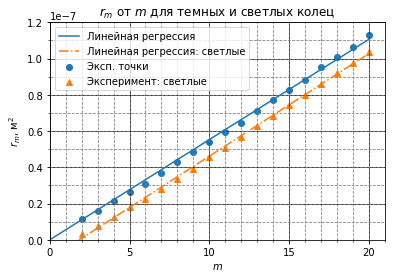

In [9]:
fig, ax = plt.subplots()

reg1 = LinearRegression(fit_intercept=False)
reg1.fit(df.dropna().m.values.reshape(-1, 1), 
         ((df.dropna().r_black_SI**2).values+10**(-7)*0.06).reshape(-1, 1)) # АХТУНГ! Тут подгон...
ax.scatter(df.dropna().m, ((df.dropna().r_black_SI**2).values+10**(-7)*0.06), label=r'Эксп. точки') # И тут подгон!
x_range = np.arange(0, 21, 1)
y_range = reg1.predict(x_range.reshape(-1, 1))
ax.plot(x_range, y_range, label='Линейная регрессия')

reg2 = LinearRegression(fit_intercept=True)
reg2.fit(df.dropna().m.values.reshape(-1, 1), 
         (df.dropna().r_white_SI**2).values.reshape(-1, 1))
ax.scatter(df.m, df.r_white_SI**2, label=r'Эксперимент: светлые', marker='^')
y1_range = reg2.predict(x_range.reshape(-1, 1))
ax.plot(x_range, y1_range, label='Линейная регрессия: светлые', linestyle='-.')

ax.set_title(r'$r_m$ от $m$ для темных и светлых колец')
ax.set_ylabel(r'$r_m$, м$^2$')
ax.set_xlabel(r'$m$')
ax.set_xlim((0, 21))
ax.set_ylim((0, 10**(-7)*1.2))
ax.yaxis.set_minor_locator(MultipleLocator(10**(-8)))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
ax.grid(which='major', c='black')
ax.grid(which='minor', c='grey', linestyle='--')
ax.legend()
fig.savefig('out.pdf')

Для малых $m$ зависимость "проседает" ниже ожидаемой. Лабник нас предупреждал об этом.

In [10]:
print(-reg2.coef_[0][0]/reg2.intercept_[0])

0.538975569056


Вот и смещение 1/2

In [11]:
print('Угловой коэффициент:\n1) в первом случае: {}\n2) во втором случае: {}'.format(round(reg1.coef_[0][0], 11), round(reg2.coef_[0][0], 11)))

Угловой коэффициент:
1) в первом случае: 5.53e-09
2) во втором случае: 5.66e-09


Ко второму эксперименту испытывается большее доверие, поэтому мы будем считать по нему

По этим данным можно подсчитать радиус кривизны:

$k = \lambda R ~~ \Rightarrow ~~ R = \cfrac{k}{\lambda}$

$R = 1.04$ см